<a href="https://colab.research.google.com/github/Tyler9937/DS-Unit-4-Sprint-2-Neural-Networks/blob/master/Copy_of_LS_DS_433_Keras_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Neural Network Framework (Keras)

## *Data Science Unit 4 Sprint 2 Assignmnet 3*

## Use the Keras Library to build a Multi-Layer Perceptron Model on the Boston Housing dataset

- The Boston Housing dataset comes with the Keras library so use Keras to import it into your notebook. 
- Normalize the data (all features should have roughly the same scale)
- Import the type of model and layers that you will need from Keras.
- Instantiate a model object and use `model.add()` to add layers to your model
- Since this is a regression model you will have a single output node in the final layer.
- Use activation functions that are appropriate for this task
- Compile your model
- Fit your model and report its accuracy in terms of Mean Squared Error
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Run this same data through a linear regression model. Which achieves higher accuracy?
- Do a little bit of feature engineering and see how that affects your neural network model. (you will need to change your model to accept more inputs)
- After feature engineering, which model sees a greater accuracy boost due to the new features?

In [0]:
# Importing needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import boston_housing

# Loading in dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [16]:
# Checking train shape
train_data.shape

(404, 13)

In [0]:
# Normalizing the data
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std 

test_data -= mean
test_data /= std

In [53]:
# Importing tensorflow libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Creating the model
# using 3 layers with 64 nodes
# final layer one output node
# activation functions are relu
# using mae for metrics and mse for loss
model = Sequential()

model.add(Dense(64, input_dim=13, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_27 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Fitting the model on data
model.fit(train_data, train_targets, epochs=500)

In [55]:
# Printing score
scores = model.evaluate(train_data, train_targets)
scores

404/404 [==============================] - 0s 210us/sample - loss: 1.2289 - mean_absolute_error: 0.7830


[1.2289230133047198, 0.78302324]

In [56]:
# Printing mae on train data
print(f"{model.metrics_names[1]}: {scores[1]*100}")

mean_absolute_error: 78.30232381820679


In [57]:
# Printing mae and score on test data
scores = model.evaluate(test_data, test_targets)
scores
print(f"{model.metrics_names[1]}: {scores[1]*100}")

102/102 [==============================] - 0s 104us/sample - loss: 14.2276 - mean_absolute_error: 2.5630
mean_absolute_error: 256.296968460083


In [0]:
# saving model.fit to history
history = model.fit(train_data, train_targets, validation_split=0.33, epochs=500, batch_size=10, verbose=0)

In [71]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'mean_absolute_error', 'val_loss', 'val_mean_absolute_error'])


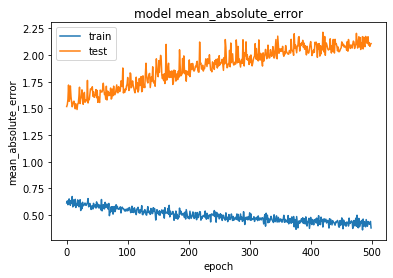

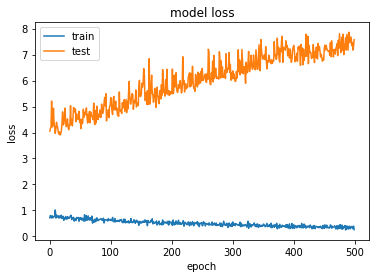

In [72]:
# Using plot structure from a tutorial can be found here https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/

# summarize history for accuracy
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
# Importing linearreggresstoin
from sklearn.linear_model import LinearRegression

# Fitting a linear regression model on training data
reg = LinearRegression().fit(train_data, train_targets)

In [114]:
# Calculating mean square error for linear regression

from sklearn.metrics import mean_squared_error, r2_score


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(train_data, train_targets)

# Make predictions using the testing set
y_pred = regr.predict(test_data)

# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(test_targets, y_pred))


Mean squared error: 23.20


## Use the Keras Library to build an image recognition network using the Fashion-MNIST dataset (also comes with keras)

- Load and preprocess the image data similar to how we preprocessed the MNIST data in class.
- Make sure to one-hot encode your category labels
- Make sure to have your final layer have as many nodes as the number of classes that you want to predict.
- Try different hyperparameters. What is the highest accuracy that you are able to achieve.
- Use the history object that is returned from model.fit to make graphs of the model's loss or train/validation accuracies by epoch. 
- Remember that neural networks fall prey to randomness so you may need to run your model multiple times (or use Cross Validation) in order to tell if a change to a hyperparameter is truly producing better results.

In [75]:
# Importing needed libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading in and splitting data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28) y_train shape: (60000,)


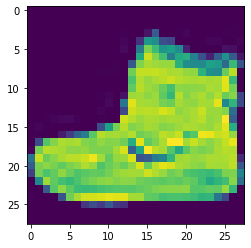

In [77]:
# Observing sample image
plt.imshow(x_train[0])

In [0]:
# Adjusting the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

In [106]:
# Creating model, tutorial followed used slightly diffrent 
# structure than what was learned in class

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [0]:
# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [108]:
model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4949 - acc: 0.8255
Epoch 2/10
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3730 - acc: 0.8648
Epoch 3/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3369 - acc: 0.8769
Epoch 4/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.3134 - acc: 0.8856
Epoch 5/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2957 - acc: 0.8921
Epoch 6/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2802 - acc: 0.8958
Epoch 7/10
60000/60000 [==============================] - 4s 73us/sample - loss: 0.2685 - acc: 0.9002
Epoch 8/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.2573 - acc: 0.9044
Epoch 9/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2490 - acc: 0.9072
Epoch 10/10
60000/60000 [==============================] - 

In [109]:
# Printing out the accurcy of the testing data
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3451 - acc: 0.8790

Test accuracy: 0.879


In [0]:
# Saving model.fit
history = model.fit(x_train, y_train, validation_split=0.33, epochs=10, verbose=0)

In [110]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


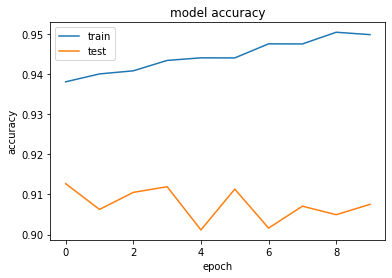

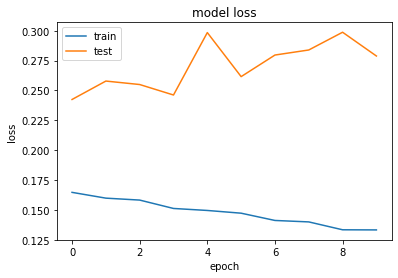

In [111]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Stretch Goals:

- Use Hyperparameter Tuning to make the accuracy of your models as high as possible. (error as low as possible)
- Use Cross Validation techniques to get more consistent results with your model.
- Use GridSearchCV to try different combinations of hyperparameters. 
- Start looking into other types of Keras layers for CNNs and RNNs maybe try and build a CNN model for fashion-MNIST to see how the results compare.